# Análisis electoral del *Frente de Izquierda y los Trabajadores - Unidad*

## MET4OP - T.P n° 2 - Ejercicio 1 - Grupo 2
##### Integrantes: Florencia Simeran, Nicolás Schteimberg, Lena Frattini

### 1.1
#### Resultados electorales por Circuito Electoral
#### Categoría: Presidente y VIcepresidente


#### Importamos las librerías

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline


#### Leemos el archivo con los datos electorales

In [2]:
resultCABA = pd.read_csv (                          # Resultados totales
    "Datos/datos_agrup.csv"
)


#### Declaramos las funciones que vamos a utilizar

In [3]:
def porcentaje_circuito(result_total, result_agrupacion):
    """
    Función que a partir de tablas con el cargo en disputa y una agrupación en específico, 
    calcula el porcentaje por circuito electoral
    """

    # Primero suma la cantidad de votos totales por circuito
    result_total_acotado = result_total[["CODIGO_CIRCUITO", "CODIGO_MESA", "VOTOS_AGRUPACION", "NOMBRE_REGION", "NOMBRE_AGRUPACION"]]

    result_total_circuito = (result_total_acotado.groupby(["NOMBRE_REGION", "CODIGO_CIRCUITO"]).sum())

    result_total_circuito = result_total_circuito.rename(columns={"VOTOS_AGRUPACION": "VOTOS_TOTALES"})


    # Luego suma la cantidad de votos de determinada agrupacion por circuito
    result_agrupacion_acotado = result_agrupacion[["CODIGO_CIRCUITO", "CODIGO_MESA", "VOTOS_AGRUPACION", "NOMBRE_REGION", "NOMBRE_AGRUPACION"]]

    result_agrupacion_circuito = (result_agrupacion_acotado.groupby(["NOMBRE_REGION", "CODIGO_CIRCUITO"]).sum())

    # Luego hace un merge, y calcula el porcentaje diviendo votos de la agrupacion por totales
    porcentaje_circuito = pd.merge(result_total_circuito, result_agrupacion_circuito, on=["NOMBRE_REGION","CODIGO_CIRCUITO"])

    porcentaje_circuito["PORCENTAJE_AGRUPACION"] = ((porcentaje_circuito["VOTOS_AGRUPACION"] / porcentaje_circuito["VOTOS_TOTALES"]) * 100).round(2)


    return porcentaje_circuito

### DataFrames construidos 


#### Resultados del FIT en cada mesa solo para Presidente

In [4]:
resultCABA_pres_fit = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD")]


#### Resultados totales en cada mesa solo para Presidente

In [5]:
resultCABA_pres_total = resultCABA[resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República"]

#### Porcentaje de voto al FIT por Circuito para la categoría "Presidente y vicepresidente"

In [6]:
porc_pres_circuito_fit = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_fit)

#### Los circuitos con valores que superan el cuarto cuartil
###### (Los valores del último cuartil figuran como Cuartil N°3, dado que Pandas empieza a contar desde 0)

In [9]:
porc_pres_circuito_fit_q75 = porc_pres_circuito_fit.copy()
porc_pres_circuito_fit_q75
porc_pres_circuito_fit_q75["CUARTIL"] = pd.qcut(porc_pres_circuito_fit_q75["PORCENTAJE_AGRUPACION"],q=4, labels= False)

In [10]:
porc_pres_circuito_fit_q75[porc_pres_circuito_fit_q75["CUARTIL"] == 3].sort_values(by=["PORCENTAJE_AGRUPACION"], ascending= False) 

VOTOS_TOTALES  VOTOS_AGRUPACION  \
NOMBRE_REGION CODIGO_CIRCUITO                                    
COMUNA 15     1015000164                8654               455   
              1015000162               12689               658   
COMUNA 05     1005000059               10370               537   
COMUNA 03     1003000036                6242               322   
COMUNA 01     1001000002                6643               335   
COMUNA 05     1005000067               15739               785   
COMUNA 06     1006000072               10797               533   
COMUNA 15     1015000160               17775               874   
COMUNA 03     1003000041               13765               676   
COMUNA 10     1010000109               15192               738   
COMUNA 15     1015000161               15639               759   
COMUNA 10     1010000108                9711               470   
COMUNA 06     1006000073               13841               670   
COMUNA 05     1005000065               10511               508   
COMUNA 01     1001000016                5959               287   
              1001000001                7137               343   
COMUNA 04     1004000044                7296               351   
COMUNA 05     1005000066               10201               490   
              1005000063               15545               741   
COMUNA 15     1015000159                9436               450   
COMUNA 05     1005000058               10885               518   
COMUNA 04     1004000049                9162               434   
              1004000043                9222               436   
COMUNA 05     1005000060               12272               579   
COMUNA 03     1003000035                9320               435   
COMUNA 11     1011000115                9425               440   
COMUNA 15     1015000163                9538               444   
COMUNA 06     1006000068               15756               732   
COMUNA 15     1015000158               15289               710   
COMUNA 04     1004000045                5354               248   
              1004000054               11533               528   
COMUNA 09     1009000092               10706               489   
COMUNA 04     1004000046                4894               223   
COMUNA 01     1001000013                8908               406   
COMUNA 10     1010000111                8598               390   
COMUNA 04     1004000050               11010               498   
COMUNA 11     1011000116               13646               615   
COMUNA 14     1014000156                7567               341   
COMUNA 05     1005000064               16707               754   
              1005000062                8030               362   
COMUNA 09     1009000094                8441               380   
COMUNA 03     1003000033                6477               290   

                               PORCENTAJE_AGRUPACION  CUARTIL  
NOMBRE_REGION CODIGO_CIRCUITO                                  
COMUNA 15     1015000164                        5.26        3  
              1015000162                        5.19        3  
COMUNA 05     1005000059                        5.18        3  
COMUNA 03     1003000036                        5.16        3  
COMUNA 01     1001000002                        5.04        3  
COMUNA 05     1005000067                        4.99        3  
COMUNA 06     1006000072                        4.94        3  
COMUNA 15     1015000160                        4.92        3  
COMUNA 03     1003000041                        4.91        3  
COMUNA 10     1010000109                        4.86        3  
COMUNA 15     1015000161                        4.85        3  
COMUNA 10     1010000108                        4.84        3  
COMUNA 06     1006000073                        4.84        3  
COMUNA 05     1005000065                        4.83        3  
COMUNA 01     1001000016                        4.82        3  
              1001000001              

### Análisis 1.1:
A primera vista podría parecer que estos circuitos (los que cuentan con un mayor porcentaje de votos para el FIT) deber priorizarse a la hora de buscar electores para acercarse al objetivo de convertirse en tercera fuerza a nivel presidencial


Pero vamos a analizarlo un poco más a fondo

### 1.2
 Realizamos el mismo procedimiento de antes, pero esta vez dividiendo por Comunas dado que son las unidades geográfica pre-determinadas más claras con las que podemos trabajar por el momento

In [11]:
def porcentaje_comuna(porcentaje_circuito):
    """
    Función que en base al porcentaje por circuito
    calcula el porcentaje por comuna
    """
    porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())
    porcentaje_comuna["PORCENTAJE_AGRUPACION"] = ((porcentaje_comuna["VOTOS_AGRUPACION"] / porcentaje_comuna["VOTOS_TOTALES"] * 100).round(2))

    return porcentaje_comuna

#### Porcentaje de voto para el FIT, para la categoría "Presidente y Vicepresidente", por Comunas

In [12]:
porc_pres_comuna_fit = porcentaje_comuna(porc_pres_circuito_fit)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_2708/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [13]:
porc_pres_comuna_fit

,VOTOS_TOTALES,VOTOS_AGRUPACION,PORCENTAJE_AGRUPACION
NOMBRE_REGION,,,
COMUNA 01,122034,4368,3.58
COMUNA 02,104294,2620,2.51
COMUNA 03,117157,5124,4.37
COMUNA 04,136899,5798,4.24
COMUNA 05,121975,5740,4.71
COMUNA 06,127594,5248,4.11
COMUNA 07,134121,5247,3.91
COMUNA 08,107120,4018,3.75
COMUNA 09,116632,4568,3.92


Como podemos ver, el porcentaje de voto por comuna se encuentra entre el 2.51% (siendo la Comuna 2 -compuesta por el barrio de Recoleta- aquella en la que el FIT obtuvo menos votos presidenciales) y el 4.74% (siendo la Comuna 15 -compuesta por Chacarita, Villa Crespo, La Paternal, Villa Ortúzar, Agronomía y Parque Chas- aquella en la que el FIT obtuvo más votos presidenciales)



#### Gráfico de cantidad de votos presidenciales del partido FIT por comuna 

<AxesSubplot:xlabel='NOMBRE_REGION', ylabel='VOTOS_AGRUPACION'>

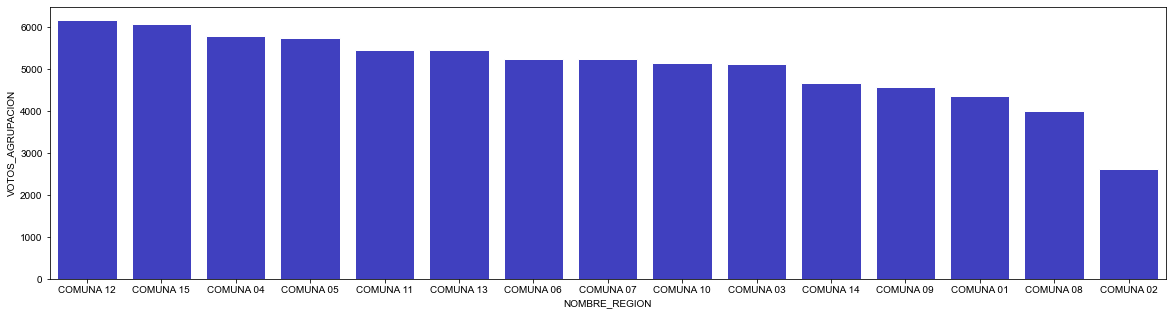

In [14]:
gr1 = porc_pres_comuna_fit.reset_index()
gr1
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style = 'darkgrid')
sns.barplot(y = 'VOTOS_AGRUPACION', x = 'NOMBRE_REGION', data= gr1.sort_values(by= 'VOTOS_AGRUPACION', ascending= False),ax=ax, color= 'blue', saturation = 0.5)

Como podemos observar en el gráfico anterior, en la gran mayoría de las comunas, el FIT obtuvo entre 4500 y 6000 votos en la categoría "Presidente y Vicepresidente". Vemos que hay una sola comuna en la que el FIT obtuvo menos de 3000 votos (la Comuna 2), seguida por la Comuna 8 (compuesta por los barrios de Villa Soldati, Villa Riachuelo, Villa Lugano) en la que el FIT obtuvo 4000 votos. Y, además, en dos de las Comunas obtuvo más de 6000 votos (la comuna 15 y la Comuna 12). 

#### Gráfico de porcentaje de votos presidenciales del partido FIT por comuna 

Text(0.5, 1.0, 'Porcentaje de votos al FIT por comuna')

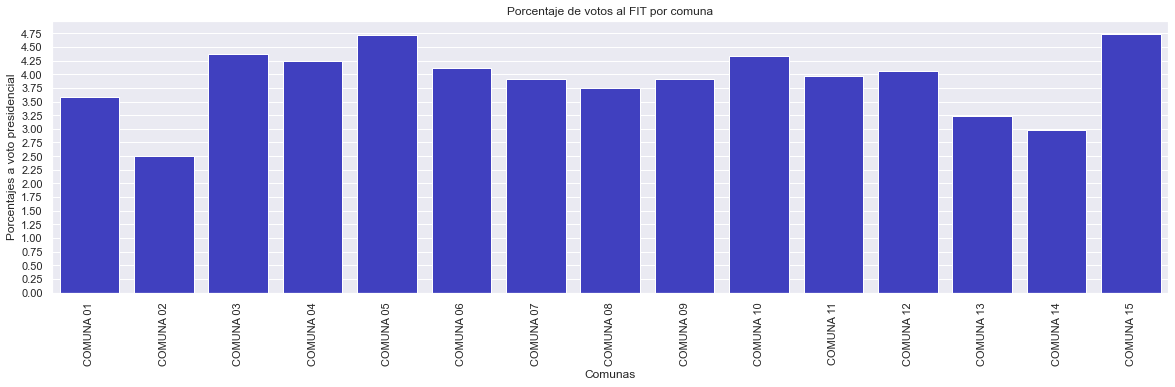

In [15]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = 'PORCENTAJE_AGRUPACION', x = 'NOMBRE_REGION', data= gr1,ax=ax, color= 'blue', saturation = 0.5)
plt.xticks(rotation=90)
ytick = np.arange(0,5,0.25)
plt.yticks(ytick)
plt.ylabel('Porcentajes a voto presidencial')
plt.xlabel('Comunas')
plt.title('Porcentaje de votos al FIT por comuna')

Si hablamos en términos de porcentaje, la diferencia continúa siendo evidente, y podemos observar claramente que algunas comunas (como la Comuna 15) prácticamente doblan la cantidad de votos de otras (como la Comuna 2).

#### Comunas que superan el cuarto cuartil
###### (Los valores del último cuartil figuran como Cuartil N°3, dado que Pandas empieza a contar desde 0)

In [16]:
porc_pres_comuna_fit_q75 = porc_pres_comuna_fit.copy()
porc_pres_comuna_fit_q75
porc_pres_comuna_fit_q75["CUARTIL"] = pd.qcut(porc_pres_comuna_fit_q75["PORCENTAJE_AGRUPACION"],q=4, labels= False)

In [17]:
porc_pres_comuna_fit_q75[porc_pres_comuna_fit_q75["CUARTIL"] == 3].sort_values(by=["PORCENTAJE_AGRUPACION"], ascending= False) 

,VOTOS_TOTALES,VOTOS_AGRUPACION,PORCENTAJE_AGRUPACION,CUARTIL
NOMBRE_REGION,,,,
COMUNA 15,128547,6094,4.74,3
COMUNA 05,121975,5740,4.71,3
COMUNA 03,117157,5124,4.37,3
COMUNA 10,118733,5148,4.34,3


#### Gráfico de porcentaje de votos presidenciales del partido FIT ordenados de mayor a menor por comuna 

Text(0.5, 1.0, 'Porcentaje de votos al FIT por comuna')

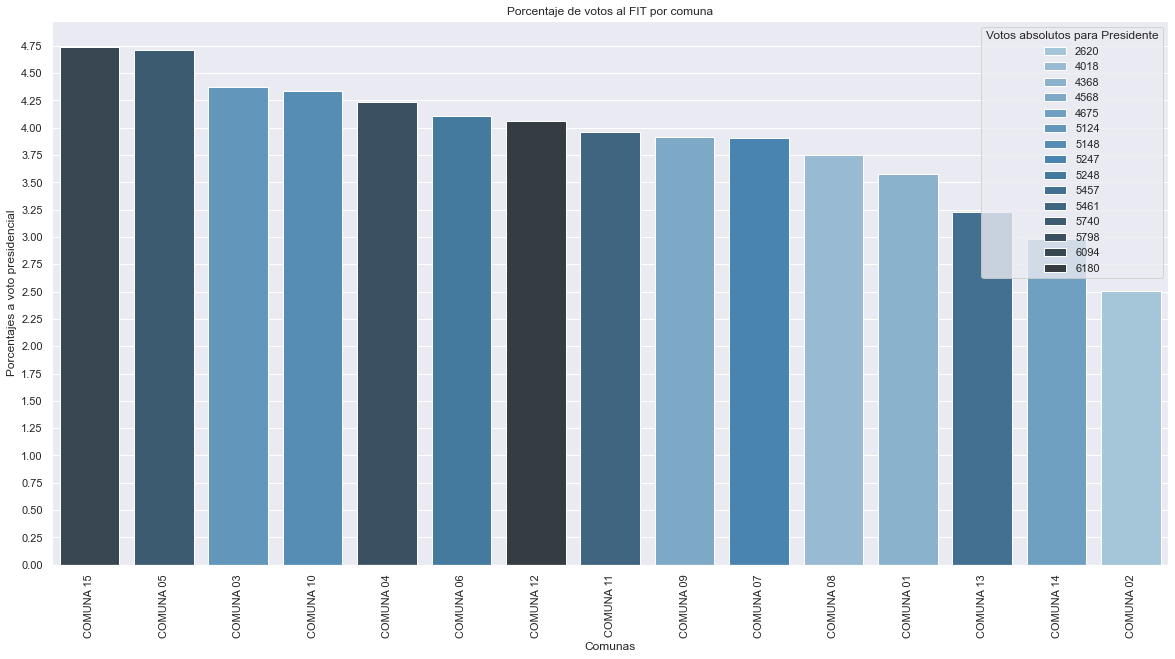

In [18]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = 'PORCENTAJE_AGRUPACION', x = 'NOMBRE_REGION', data= gr1.sort_values(by='PORCENTAJE_AGRUPACION', ascending= False),ax=ax, hue= 'VOTOS_AGRUPACION', palette= 'Blues_d', dodge= False)
plt.xticks(rotation=90)
ytick = np.arange(0,5,0.25)
plt.yticks(ytick)
plt.ylabel('Porcentajes a voto presidencial')
plt.xlabel('Comunas')
plt.legend(title= 'Votos absolutos para Presidente')
plt.title('Porcentaje de votos al FIT por comuna')

Como observamos en el gráfico anterior, se presenta una diferencia marcada entre las dos comunas en las que el FIT obtuvo mayor cantidad de votos presidenciales (la Comuna 15 y la Comuna 5) con respecto a la que se encuentra tercera en ese orden (la Comuna 3), sin embargo, luego el gráfico decrece de manera menos abrupta, hasta llegar a la Comuna 13, la cuál presenta una diferencia más marcada que las anteriores con respecto a la comuna que la precede en cantidad de votos, de ahí en más el decrecimiento de la cantidad de votos de una comuna a otra se va dando de manera más abrupta. Como es de esperar, pareciera ser que hay pocas Comunas en las que el voto al FIT es alto (en relación a su porcentaje de voto histórico), pocas comunas en las que el voto al FIT es bajo, y muchas columnas en las que el porcentaje de votos se ubica en un nivel intermedio. 

Sin embargo, recordando el primer gráfico (el de voto total) la Comuna 13 tiene un importante caudal de votos aunque no sea tan grande en porcentaje. Lo cual se puede ver en su color fuerte. Sucede algo similar (pero menos marcado) con la comuna 07 

 Ahora obtenemos la media del porcentaje de votos obtenidos por comuna por el FIT en la categoría "Presidente y Vicepresidente"

### Análisis 1.2:
Ahora bien. A la hora de plantear una estrategia más general, hay una serie de cosas que debemos tener en cuenta. Por empezar, el Frente de Izquieda y los trabajadores - Unidad es un frente electoral que se encuentra conformado por partidos relativamente pequeños (al menos si lo comparamos con el Frente de Todos y con Juntos por el Cambio, los partidos mayoritarios). Dada esta situación, debemos ser realistas, y enfocarnos en aquellas comunas que puedan ser, en la práctica, abarcadas por el FIT, con una cantidad limitada de militantes. 


#### Dado lo anterior,se priorizaran las comunas 15, 05, 04, 12, 13, 03, y 10
Pero a continuación intentaremos establecer un orden de prioridades. 

### 2.1
#### Corte de boleta
 Dada la estrategia que el FIT viene llevando hace algunos años (intentar garantizar su presencia en el congreso, mediante el voto a Diputados Nacionales) podríamos pensar que el fenómenos del corte de boleta podría ser relevante a la hora de analizar los resultados electorales del frente. Por lo que nos proponemos analizarlo a continuación

Declaramos una función que calcula la diferencia entre el voto a presidente y el voto a diputados nacionales, aplicable para todos los frentes/partidos

In [19]:
def corte_boleta(porc_pres, porc_dip):
    """
    Resta el voto en categoría Diputado con el Presidencial 
    para cualcular corte de boleta
    """
    
    porc_pres = porc_pres.rename(columns={"VOTOS_TOTALES": "VOTOS_TOTALES_PRES", "VOTOS_AGRUPACION": "VOTOS_AGRUPACION_PRES", "PORCENTAJE_AGRUPACION": "PORCENTAJE_AGRUPACION_PRES"})
    porc_dip = porc_dip.rename(columns={"VOTOS_TOTALES": "VOTOS_TOTALES_DIP", "VOTOS_AGRUPACION": "VOTOS_AGRUPACION_DIP", "PORCENTAJE_AGRUPACION": "PORCENTAJE_AGRUPACION_DIP"})

    comparacion_pres_dip = pd.merge(porc_pres, porc_dip, left_index=True, right_index=True)

    comparacion_pres_dip["DIFERENCIA_ABS_DIP_PRES"] = (comparacion_pres_dip["VOTOS_AGRUPACION_DIP"] - comparacion_pres_dip["VOTOS_AGRUPACION_PRES"])
    comparacion_pres_dip["DIFERENCIA_REL_DIP_PRES"] = (comparacion_pres_dip["PORCENTAJE_AGRUPACION_DIP"] - comparacion_pres_dip["PORCENTAJE_AGRUPACION_PRES"])

    return comparacion_pres_dip

Resultados totales en cada mesa solo para Diputado Nacional

In [20]:
resultCABA_dip_total = resultCABA[resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires"]

Resultados del FIT en cada mesa solo para Diputado

In [21]:
resultCABA_dip_fit = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD")]


#### Porcentaje de Diputados Nacionales del FIT por circuito


In [22]:
porc_dip_circ_fit = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_fit)

In [23]:
porc_dip_circ_fit

VOTOS_TOTALES  VOTOS_AGRUPACION  \
NOMBRE_REGION CODIGO_CIRCUITO                                    
COMUNA 01     1001000001                7115               414   
              1001000002                6635               401   
              1001000003                3377                47   
              1001000005                5393               182   
              1001000006               11100               187   
...                                      ...               ...   
COMUNA 15     1015000163                9521               581   
              1015000164                8653               593   
              1015000165               15825               915   
              1015000166               13177               772   
              1015000167               10606               563   

                               PORCENTAJE_AGRUPACION  
NOMBRE_REGION CODIGO_CIRCUITO                         
COMUNA 01     1001000001                        5.82  
              1001000002                        6.04  
              1001000003                        1.39  
              1001000005                        3.37  
              1001000006                        1.68  
...                                              ...  
COMUNA 15     1015000163                        6.10  
              1015000164                        6.85  
              1015000165                        5.78  
              1015000166                        5.86  
              1015000167                        5.31  

[166 rows x 3 columns]

####  Porcentaje de Diputados Nacionales del FIT por comuna

In [24]:
porc_dip_comuna_fit = porcentaje_comuna(porc_dip_circ_fit)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_2708/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [25]:
porc_dip_comuna_fit

,VOTOS_TOTALES,VOTOS_AGRUPACION,PORCENTAJE_AGRUPACION
NOMBRE_REGION,,,
COMUNA 01,121775,5149,4.23
COMUNA 02,103939,3261,3.14
COMUNA 03,116979,6062,5.18
COMUNA 04,136912,6427,4.69
COMUNA 05,121949,7065,5.79
COMUNA 06,127597,6597,5.17
COMUNA 07,133888,6361,4.75
COMUNA 08,106347,4164,3.92
COMUNA 09,116615,5056,4.34


#### Gráfico de cantidad de votos a diputados del partido FIT por comuna 

<AxesSubplot:xlabel='NOMBRE_REGION', ylabel='VOTOS_AGRUPACION'>

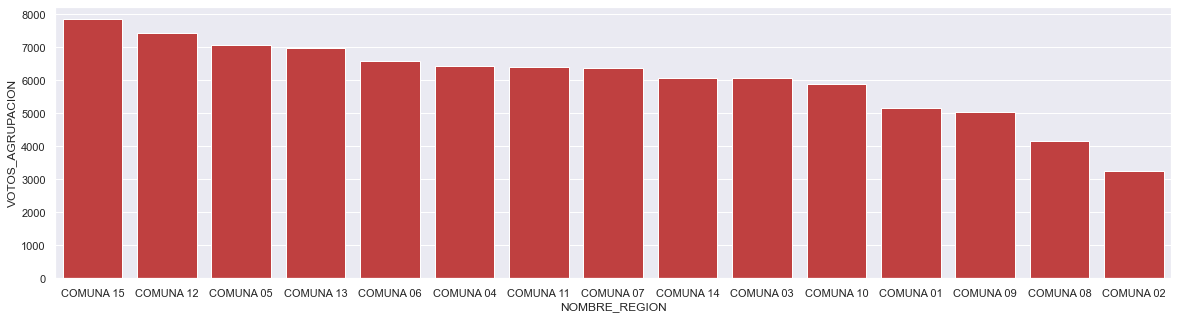

In [26]:
gr2 = porc_dip_comuna_fit.reset_index()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style = 'darkgrid')
sns.barplot(y = 'VOTOS_AGRUPACION', x = 'NOMBRE_REGION', data= gr2.sort_values(by= 'VOTOS_AGRUPACION', ascending= False),ax=ax, color= 'red', saturation = 0.5)

#### Gráfico de porcentaje de votos a diputados del partido FIT por comuna 

Text(0.5, 1.0, 'Porcentaje de votos al FIT por comuna. Categoría Diputados')

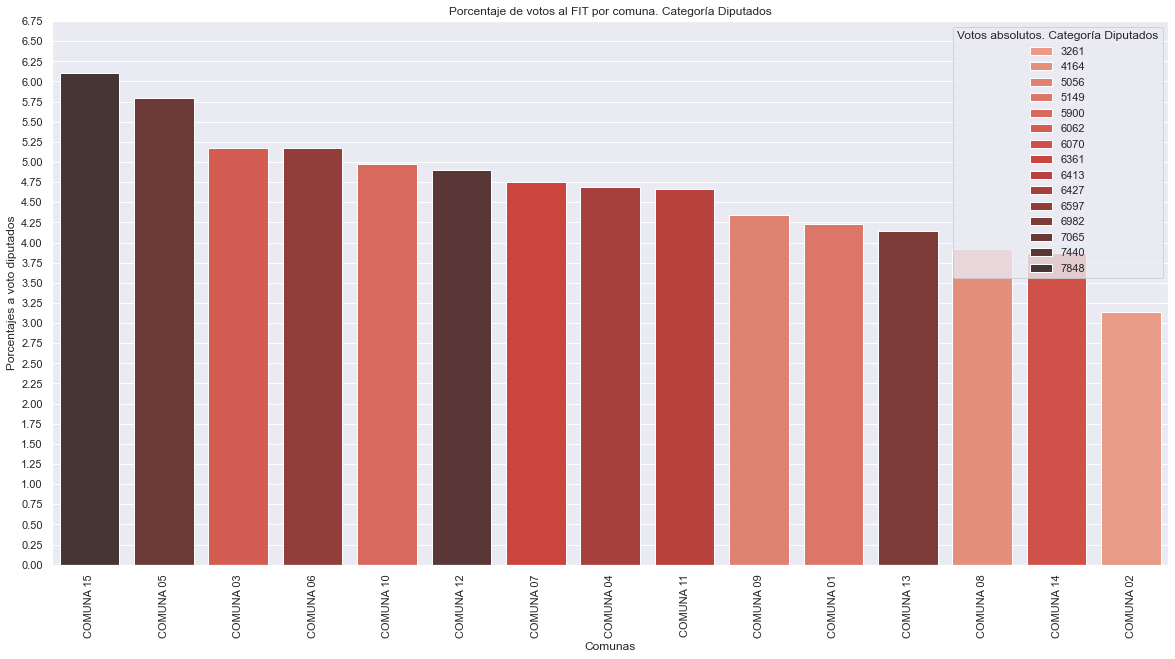

In [49]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = 'PORCENTAJE_AGRUPACION', x = 'NOMBRE_REGION', data= gr2.sort_values(by='PORCENTAJE_AGRUPACION', ascending= False),ax=ax, hue= 'VOTOS_AGRUPACION', palette= 'Reds_d', dodge= False)
plt.xticks(rotation=90)
ytick = np.arange(0,7,0.25)
plt.yticks(ytick)
plt.ylabel('Porcentajes a voto diputados')
plt.xlabel('Comunas')
plt.legend(title= 'Votos absolutos. Categoría Diputados')
plt.title('Porcentaje de votos al FIT por comuna. Categoría Diputados')




Nuevamente obtenemos la media del voto a diputados nacionales por comuna al FIT

#### Diferencia entre el voto a diputados nacionales y el presidencial por circuitos


In [28]:
diferencia_fit_circ = corte_boleta(porc_pres_circuito_fit, porc_dip_circ_fit)
diferencia_fit_circ

VOTOS_TOTALES_PRES  VOTOS_AGRUPACION_PRES  \
NOMBRE_REGION CODIGO_CIRCUITO                                              
COMUNA 01     1001000001                     7137                    343   
              1001000002                     6643                    335   
              1001000003                     3377                     31   
              1001000005                     5402                    176   
              1001000006                    11110                    148   
...                                           ...                    ...   
COMUNA 15     1015000163                     9538                    444   
              1015000164                     8654                    455   
              1015000165                    15832                    700   
              1015000166                    13176                    588   
              1015000167                    10519                    456   

                               PORCENTAJE_AGRUPACION_PRES  VOTOS_TOTALES_DIP  \
NOMBRE_REGION CODIGO_CIRCUITO                                                  
COMUNA 01     1001000001                             4.81               7115   
              1001000002                             5.04               6635   
              1001000003                             0.92               3377   
              1001000005                             3.26               5393   
              1001000006                             1.33              11100   
...                                                   ...                ...   
COMUNA 15     1015000163                             4.66               9521   
              1015000164                             5.26               8653   
              1015000165                             4.42              15825   
              1015000166                             4.46              13177   
              1015000167                             4.34              10606   

                               VOTOS_AGRUPACION_DIP  \
NOMBRE_REGION CODIGO_CIRCUITO                         
COMUNA 01     1001000001                        414   
              1001000002                        401   
              1001000003                         47   
              1001000005                        182   
              1001000006                        187   
...                                             ...   
COMUNA 15     1015000163                        581   
              1015000164                        593   
              1015000165                        915   
              1015000166                        772   
              1015000167                        563   

                               PORCENTAJE_AGRUPACION_DIP  \
NOMBRE_REGION CODIGO_CIRCUITO                              
COMUNA 01     1001000001                            5.82   
              1001000002                            6.04   
              1001000003                            1.39   
              1001000005                            3.37   
              1001000006                            1.68   
...                                                  ...   
COMUNA 15     1015000163                            6.10   
              1015000164                            6.85   
              1015000165                            5.78   
              1015000166                            5.86   
              1015000167                            5.31   

                               DIFERENCIA_ABS_DIP_PRES  \
NOMBRE_REGION CODIGO_CIRCUITO                            
COMUNA 01     1001000001                            71   
              1001000002                            66   
              1001000003                            16   
              1001000005                             6   
              1001000006                            39   
...                                                ...   
COMUNA 15     1015000163                

#### Diferencia entre el voto a diputados nacionales y el presidencial por comunas. Es decir, el porcentaje de electores por cada comuna que para Presidente votaron a otros frentes/partidos, y para Diputados Nacionales votaron al FIT

In [29]:
diferencia_fit_comuna = corte_boleta(porc_pres_comuna_fit, porc_dip_comuna_fit)

In [30]:

diferencia_fit_comuna.sort_values(by=["DIFERENCIA_REL_DIP_PRES"], ascending = False)


,VOTOS_TOTALES_PRES,VOTOS_AGRUPACION_PRES,PORCENTAJE_AGRUPACION_PRES,VOTOS_TOTALES_DIP,VOTOS_AGRUPACION_DIP,PORCENTAJE_AGRUPACION_DIP,DIFERENCIA_ABS_DIP_PRES,DIFERENCIA_REL_DIP_PRES
NOMBRE_REGION,,,,,,,,
COMUNA 15,128547,6094,4.74,128567,7848,6.10,1754,1.36
COMUNA 05,121975,5740,4.71,121949,7065,5.79,1325,1.08
COMUNA 06,127594,5248,4.11,127597,6597,5.17,1349,1.06
COMUNA 13,168762,5457,3.23,168452,6982,4.14,1525,0.91
COMUNA 14,156784,4675,2.98,156863,6070,3.87,1395,0.89
COMUNA 12,152159,6180,4.06,151949,7440,4.90,1260,0.84
COMUNA 07,134121,5247,3.91,133888,6361,4.75,1114,0.84
COMUNA 03,117157,5124,4.37,116979,6062,5.18,938,0.81
COMUNA 11,137736,5461,3.96,137473,6413,4.66,952,0.70


### Comparación entre el voto a Diputados y el voto a Presidente

Text(0.5, 1.0, 'Porcentaje de votos al FIT por comuna')

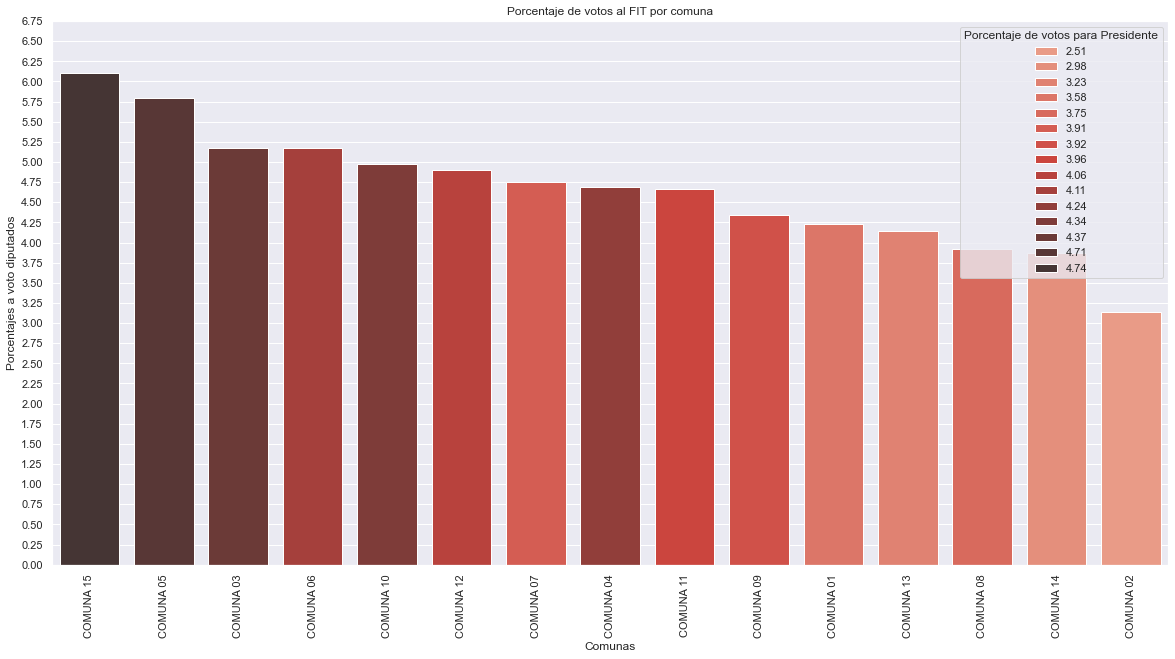

In [31]:
gr3 = diferencia_fit_comuna.reset_index()
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = 'PORCENTAJE_AGRUPACION_DIP', x = 'NOMBRE_REGION', data= gr3.sort_values(by='PORCENTAJE_AGRUPACION_DIP', ascending= False),ax=ax, hue= 'PORCENTAJE_AGRUPACION_PRES', palette= 'Reds_d', dodge= False)
plt.xticks(rotation=90)
ytick = np.arange(0,7,0.25)
plt.yticks(ytick)
plt.ylabel('Porcentajes a voto diputados')
plt.xlabel('Comunas')
plt.legend(title= 'Porcentaje de votos para Presidente')
plt.title('Porcentaje de votos al FIT por comuna')



Se puede apreciar la tendencia a que las comunas con buenos resultados para Diputados también lo tuvieron para Presidente, pero con algunas exceocuibes cini ka cinyba 04. Veamos con más profundidad esas diferencias

### Corte de boleta: Diferencia entre el voto de Diputados y el de Prresidente

Text(0.5, 1.0, 'Diferencia entre voto DIputado y Presidente por comuna por comuna')

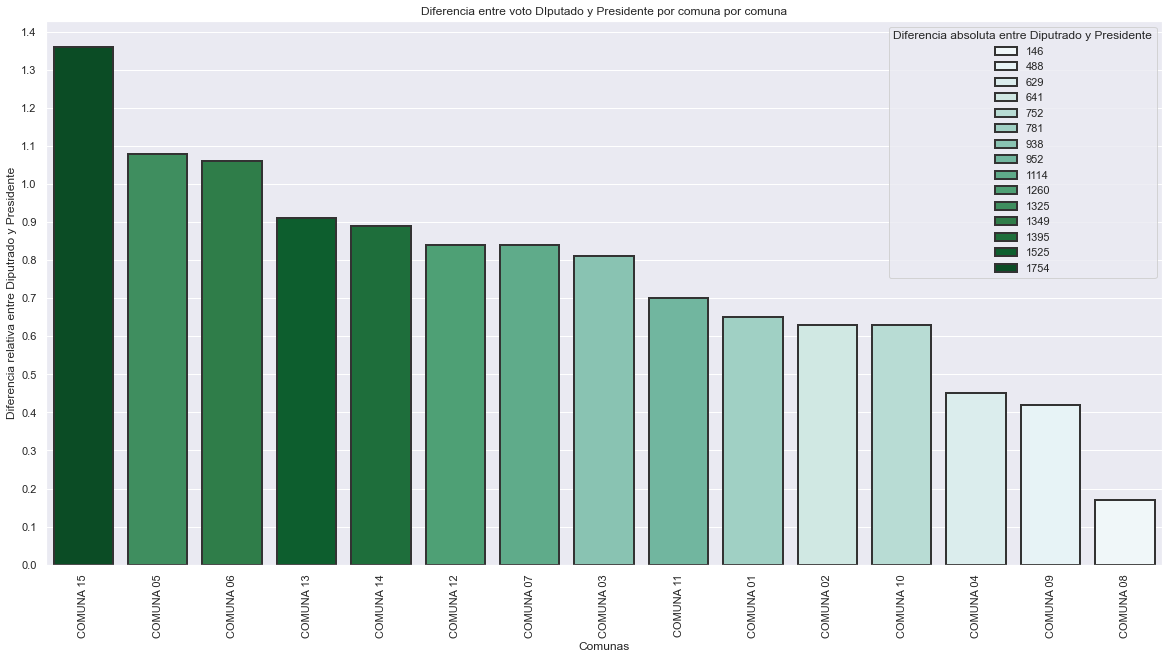

In [32]:
gr3 = diferencia_fit_comuna.reset_index()
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = 'DIFERENCIA_REL_DIP_PRES', x = 'NOMBRE_REGION', data= gr3.sort_values(by='DIFERENCIA_REL_DIP_PRES', ascending= False),linewidth=2, edgecolor=".2",ax=ax, hue= 'DIFERENCIA_ABS_DIP_PRES', palette= 'BuGn', dodge= False)
plt.xticks(rotation=90)
ytick = np.arange(0,1.5,0.10)
plt.yticks(ytick)
plt.ylabel('Diferencia relativa entre Diputrado y Presidente')
plt.xlabel('Comunas')
plt.legend(title= 'Diferencia absoluta entre Diputrado y Presidente')
plt.title('Diferencia entre voto DIputado y Presidente por comuna por comuna')



### Análisis 2.1:

 En primer lugar podemos mencionar que, en lo que respecta a Diputados Nacionales, las comunas con mayor votos absoluto son la 15,12, 05,13 y 6. Mientras que las que tienen mayor porcentaje de votos son las 15, 05, 03, 10 y 06. Por lo que todas estas son las que deberían priorizarse

 



 Se puede apreciar, además, que **en todas las comunas la diferencia entre presidente y Diputados Nacionales, para el FIT, es positiva**. Es decir, en todas las comunas hay más voto para Diputados que para Presidente

Por lo tanto, creemos que una estrategia que apunte a conseguir votos para esta categoría es más viable que una estrategia que apunte a conseguir votos para Presidente.

Además, y visto lo anterior, parecieran tener mayor relevancia las comunas 5, 6 y 15, dado que tienen un alto porcentaje de corte de boleta. Y las comunas 13 y 14, si bien no tienen los más altos porcentajes, sí estan entre las cantidades más añtas de corte de boleta. Por lo que todos estas comunas deben ser priorizadas para militar el voto a diputados

### 2.2:
 Se puede comparar la misma diferencia en el resto de las agrupaciones.


Las agrupaciones cuya diferencia de negativa, tienen más votos para Presidente que para Diputados Nacionales


Por lo tanto, es de esas agrupaciones de donde se estan sacando votos en cada comuna

In [33]:
# Resultados del FdT en cada mesa solo para Presidente
resultCABA_pres_fdt = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE TODOS")]

# Porcentaje de Diputados Nacionales del FdT por circuito
porc_pres_circ_fdt = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_fdt)

# Porcentaje de Diputados Nacionales del FdT por comuna
porc_pres_comuna_fdt = porcentaje_comuna(porc_pres_circ_fdt)

# Resultados del FdT en cada mesa solo para Presidente
resultCABA_dip_fdt = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE TODOS")]


# Porcentaje de Diputados Nacionales del FdT por circuito
porc_dip_circ_fdt = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_fdt)

# Porcentaje de Diputados Nacionales del FdT por comuna
porc_dip_comuna_fdt = porcentaje_comuna(porc_dip_circ_fdt)

# Diferencia entre el voto Presidente y Diputado en FdT por COMUNA
diferencia_fdt_comuna = corte_boleta(porc_pres_comuna_fdt, porc_dip_comuna_fdt)

# Diferencia entre el voto Presidente y Diputado en FdT por CIRCUITO
diferencia_fdt_circ = corte_boleta(porc_pres_circ_fdt, porc_dip_circ_fdt)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_2708/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [34]:
# Resultados del JxC en cada mesa solo para Presidente
resultCABA_pres_jxc = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "JUNTOS POR EL CAMBIO")]

# Porcentaje de Diputados Nacionales del JxC por circuito
porc_pres_circ_jxc = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_jxc)

# Porcentaje de Diputados Nacionales del JxC por comuna
porc_pres_comuna_jxc = porcentaje_comuna(porc_pres_circ_jxc)

# Resultados del JxC en cada mesa solo para Presidente
resultCABA_dip_jxc = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "JUNTOS POR EL CAMBIO")]

# Porcentaje de Diputados Nacionales del JxC por circuito
porc_dip_circ_jxc = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_jxc)

# Porcentaje de Diputados Nacionales del JxC por comuna
porc_dip_comuna_jxc = porcentaje_comuna(porc_dip_circ_jxc)

# Diferencia entre el voto Presidente y Diputado en JxC por COMUNA
diferencia_jxc_comuna = corte_boleta(porc_pres_comuna_jxc, porc_dip_comuna_jxc)

# Diferencia entre el voto Presidente y Diputado en JxC por CIRCUITO
diferencia_jxc_circ = corte_boleta(porc_pres_circ_jxc, porc_dip_circ_jxc)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2708/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [35]:
# Resultados del cf en cada mesa solo para Presidente
resultCABA_pres_cf = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "CONSENSO FEDERAL")]

# Porcentaje de Diputados Nacionales del cf por circuito
porc_pres_circ_cf = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_cf)

# Porcentaje de Diputados Nacionales del cf por comuna
porc_pres_comuna_cf = porcentaje_comuna(porc_pres_circ_cf)

# Resultados del cf en cada mesa solo para Presidente
resultCABA_dip_cf = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "CONSENSO FEDERAL")]

# Porcentaje de Diputados Nacionales del cf por circuito
porc_dip_circ_cf = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_cf)
porc_dip_circ_cf

# Porcentaje de Diputados Nacionales del cf por comuna
porc_dip_comuna_cf = porcentaje_comuna(porc_dip_circ_cf)

# Diferencia entre el voto Presidente y Diputado en cf por COMUNA
diferencia_cf_comuna = corte_boleta(porc_pres_comuna_cf, porc_dip_comuna_cf)

# Diferencia entre el voto Presidente y Diputado en cf por CIRCUITO
diferencia_cf_circ = corte_boleta(porc_pres_circ_cf, porc_dip_circ_cf)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2708/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [36]:
# Resultados del uld en cada mesa solo para Presidente
resultCABA_pres_uld = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "UNITE POR LA LIBERTAD Y LA DIGNIDAD")]

# Porcentaje de Diputados Nacionales del uld por circuito
porc_pres_circ_uld = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_uld)

# Porcentaje de Diputados Nacionales del uld por comuna
porc_pres_comuna_uld = porcentaje_comuna(porc_pres_circ_uld)

# Resultados del uld en cada mesa solo para Presidente
resultCABA_dip_uld = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "UNITE POR LA LIBERTAD Y LA DIGNIDAD")]

# Porcentaje de Diputados Nacionales del uld por circuito
porc_dip_circ_uld = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_uld)

# Porcentaje de Diputados Nacionales del uld por comuna
porc_dip_comuna_uld = porcentaje_comuna(porc_dip_circ_uld)

# Diferencia entre el voto Presidente y Diputado en uld por COMUNA
diferencia_uld_comuna = corte_boleta(porc_pres_comuna_uld, porc_dip_comuna_uld)

# Diferencia entre el voto Presidente y Diputado en uld por CIRCUITO
diferencia_uld_circ = corte_boleta(porc_pres_circ_uld, porc_dip_circ_uld)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2708/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [37]:
#%%
# Resultados del blanco en cada mesa solo para Presidente
resultCABA_pres_blanco = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "BLANCO")]

# Porcentaje de Diputados Nacionales del blanco por circuito
porc_pres_circ_blanco = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_blanco)

# Porcentaje de Diputados Nacionales del blanco por comuna
porc_pres_comuna_blanco = porcentaje_comuna(porc_pres_circ_blanco)

# Resultados del blanco en cada mesa solo para Presidente
resultCABA_dip_blanco = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "BLANCO")]

# Porcentaje de Diputados Nacionales del blanco por circuito
porc_dip_circ_blanco = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_blanco)

# Porcentaje de Diputados Nacionales del blanco por comuna
porc_dip_comuna_blanco = porcentaje_comuna(porc_dip_circ_blanco)

# Diferencia entre el voto Presidente y Diputado en blanco por COMUNA
diferencia_blanco_comuna = corte_boleta(porc_pres_comuna_blanco, porc_dip_comuna_blanco)

# Diferencia entre el voto Presidente y Diputado en blanco por CIRCUITO
diferencia_blanco_circ = corte_boleta(porc_pres_circ_blanco, porc_dip_circ_blanco)


C:\Users\Usuario\AppData\Local\Temp/ipykernel_2708/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [38]:
diferencia_blanco_comuna = diferencia_blanco_comuna.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_BLANCO", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_BLANCO"})
diferencia_blanco_circ = diferencia_blanco_circ.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_BLANCO", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_BLANCO"})
sub_diferencia_blanco_circ = diferencia_blanco_circ[["DIFERENCIA_REL_BLANCO","DIFERENCIA_ABS_BLANCO"]]
sub_diferencia_blanco_comuna = diferencia_blanco_comuna[["DIFERENCIA_REL_BLANCO","DIFERENCIA_ABS_BLANCO"]]

diferencia_uld_comuna = diferencia_uld_comuna.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_ULD", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_ULD"})
diferencia_uld_circ = diferencia_uld_circ.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_ULD", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_ULD"})
sub_diferencia_uld_circ = diferencia_uld_circ[["DIFERENCIA_REL_ULD","DIFERENCIA_ABS_ULD"]]
sub_diferencia_uld_comuna = diferencia_uld_comuna[["DIFERENCIA_REL_ULD","DIFERENCIA_ABS_ULD"]]

diferencia_fit_comuna = diferencia_fit_comuna.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_FIT", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_FIT"})
diferencia_fit_circ = diferencia_fit_circ.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_FIT", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_FIT"})
sub_diferencia_fit_circ = diferencia_fit_circ[["DIFERENCIA_REL_FIT","DIFERENCIA_ABS_FIT"]]
sub_diferencia_fit_comuna = diferencia_fit_comuna[["DIFERENCIA_REL_FIT","DIFERENCIA_ABS_FIT"]]

diferencia_cf_comuna = diferencia_cf_comuna.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_CF", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_CF"})
diferencia_cf_circ = diferencia_cf_circ.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_CF", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_CF"})
sub_diferencia_cf_circ = diferencia_cf_circ[["DIFERENCIA_REL_CF", "DIFERENCIA_ABS_CF"]]
sub_diferencia_cf_comuna = diferencia_cf_comuna[["DIFERENCIA_REL_CF", "DIFERENCIA_ABS_CF"]]

diferencia_fdt_comuna = diferencia_fdt_comuna.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_FDT", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_FDT"})
diferencia_fdt_circ = diferencia_fdt_circ.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_FDT", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_FDT"})
sub_diferencia_fdt_circ = diferencia_fdt_circ[["DIFERENCIA_REL_FDT", "DIFERENCIA_ABS_FDT"]]
sub_diferencia_fdt_comuna = diferencia_fdt_comuna[["DIFERENCIA_REL_FDT", "DIFERENCIA_ABS_FDT"]]

diferencia_jxc_comuna = diferencia_jxc_comuna.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_JXC", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_JXC"})
diferencia_jxc_circ = diferencia_jxc_circ.rename(columns={"DIFERENCIA_REL_DIP_PRES": "DIFERENCIA_REL_JXC", "DIFERENCIA_ABS_DIP_PRES": "DIFERENCIA_ABS_JXC"})
sub_diferencia_jxc_circ = diferencia_jxc_circ[["DIFERENCIA_REL_JXC", "DIFERENCIA_ABS_JXC"]]
sub_diferencia_jxc_comuna = diferencia_jxc_comuna[["DIFERENCIA_REL_JXC", "DIFERENCIA_ABS_JXC"]]

#### Comparación de las diferencias por Circuito

In [39]:
comparacion_diferencia_circuito = pd.concat([sub_diferencia_jxc_circ, sub_diferencia_fdt_circ, 
                                            sub_diferencia_cf_circ, sub_diferencia_fit_circ, sub_diferencia_uld_circ, sub_diferencia_blanco_circ],
                                            axis=1)

In [40]:
comparacion_diferencia_circuito

DIFERENCIA_REL_JXC  DIFERENCIA_ABS_JXC  \
NOMBRE_REGION CODIGO_CIRCUITO                                           
COMUNA 01     1001000001                     0.27                  11   
              1001000002                     0.37                  22   
              1001000003                     0.57                  19   
              1001000005                    -0.10                  -7   
              1001000006                    -3.06                -347   
...                                           ...                 ...   
COMUNA 15     1015000163                     0.53                  44   
              1015000164                     0.52                  45   
              1015000165                     0.64                  98   
              1015000166                     0.63                  84   
              1015000167                     0.40                  80   

                               DIFERENCIA_REL_FDT  DIFERENCIA_ABS_FDT  \
NOMBRE_REGION CODIGO_CIRCUITO                                           
COMUNA 01     1001000001                    -2.50                -187   
              1001000002                    -2.46                -167   
              1001000003                    -0.92                 -31   
              1001000005                    -4.41                -244   
              1001000006                    -0.72                 -81   
...                                           ...                 ...   
COMUNA 15     1015000163                    -2.54                -249   
              1015000164                    -2.91                -252   
              1015000165                    -2.42                -386   
              1015000166                    -2.58                -339   
              1015000167                    -1.41                -122   

                               DIFERENCIA_REL_CF  DIFERENCIA_ABS_CF  \
NOMBRE_REGION CODIGO_CIRCUITO                                         
COMUNA 01     1001000001                   -0.75                -55   
              1001000002                   -0.89                -60   
              1001000003                   -0.92                -31   
              1001000005                   -0.37                -20   
              1001000006                   -0.56                -62   
...                                          ...                ...   
COMUNA 15     1015000163                   -1.29               -124   
              1015000164                   -1.10                -95   
              1015000165                   -1.35               -214   
              1015000166                   -1.44               -189   
              1015000167                   -1.32               -131   

                               DIFERENCIA_REL_FIT  DIFERENCIA_ABS_FIT  \
NOMBRE_REGION CODIGO_CIRCUITO                                           
COMUNA 01     1001000001                     1.01                  71   
              1001000002                     1.00                  66   
              1001000003                     0.47                  16   
              1001000005                     0.11                   6   
              1001000006                     0.35                  39   
...                                           ...                 ...   
COMUNA 15     1015000163                     1.44                 137   
              1015000164                     1.59                 138   
              1015000165                     1.36                 215   
              1015000166                     1.40                 184   
              1015000167                     0.97                 107   

                               DIFERENCIA_REL_ULD  DIFERENCIA_ABS_ULD  \
NOMBRE_REGION CODIGO_CIRCUITO                                           
COMUNA 01     1001000001                    -0.37                 -27   
              1001000002              

#### Comparación de las diferencias por Comuna

In [41]:
comparacion_diferencia_comuna = pd.concat([sub_diferencia_jxc_comuna, sub_diferencia_fdt_comuna, 
                                            sub_diferencia_cf_comuna, sub_diferencia_fit_comuna, sub_diferencia_uld_comuna, sub_diferencia_blanco_comuna],
                                            axis=1)

In [42]:
comparacion_diferencia_comuna

,DIFERENCIA_REL_JXC,DIFERENCIA_ABS_JXC,DIFERENCIA_REL_FDT,DIFERENCIA_ABS_FDT,DIFERENCIA_REL_CF,DIFERENCIA_ABS_CF,DIFERENCIA_REL_FIT,DIFERENCIA_ABS_FIT,DIFERENCIA_REL_ULD,DIFERENCIA_ABS_ULD,DIFERENCIA_REL_BLANCO,DIFERENCIA_ABS_BLANCO
NOMBRE_REGION,,,,,,,,,,,,
COMUNA 01,-0.18,-333,-2.06,-2606,-0.87,-1074,0.65,781,-0.41,-512,1.46,1773
COMUNA 02,-1.02,-1282,-1.08,-1188,-0.97,-1031,0.63,641,-0.48,-509,0.70,715
COMUNA 03,0.27,239,-2.13,-2558,-1.19,-1402,0.81,938,-0.40,-471,1.38,1606
COMUNA 04,0.33,452,-2.76,-3777,-0.95,-1300,0.45,629,-0.35,-473,2.35,3220
COMUNA 05,0.49,580,-2.20,-2692,-1.29,-1579,1.08,1325,-0.44,-529,0.85,1037
COMUNA 06,0.63,809,-1.98,-2531,-1.51,-1921,1.06,1349,-0.57,-722,0.43,547
COMUNA 07,0.57,665,-2.07,-2867,-1.41,-1908,0.84,1114,-0.49,-668,1.12,1494
COMUNA 08,0.52,324,-2.36,-2881,-0.79,-895,0.17,146,-0.23,-267,2.44,2564
COMUNA 09,0.62,709,-1.62,-1890,-1.23,-1435,0.42,488,-0.44,-522,1.33,1551


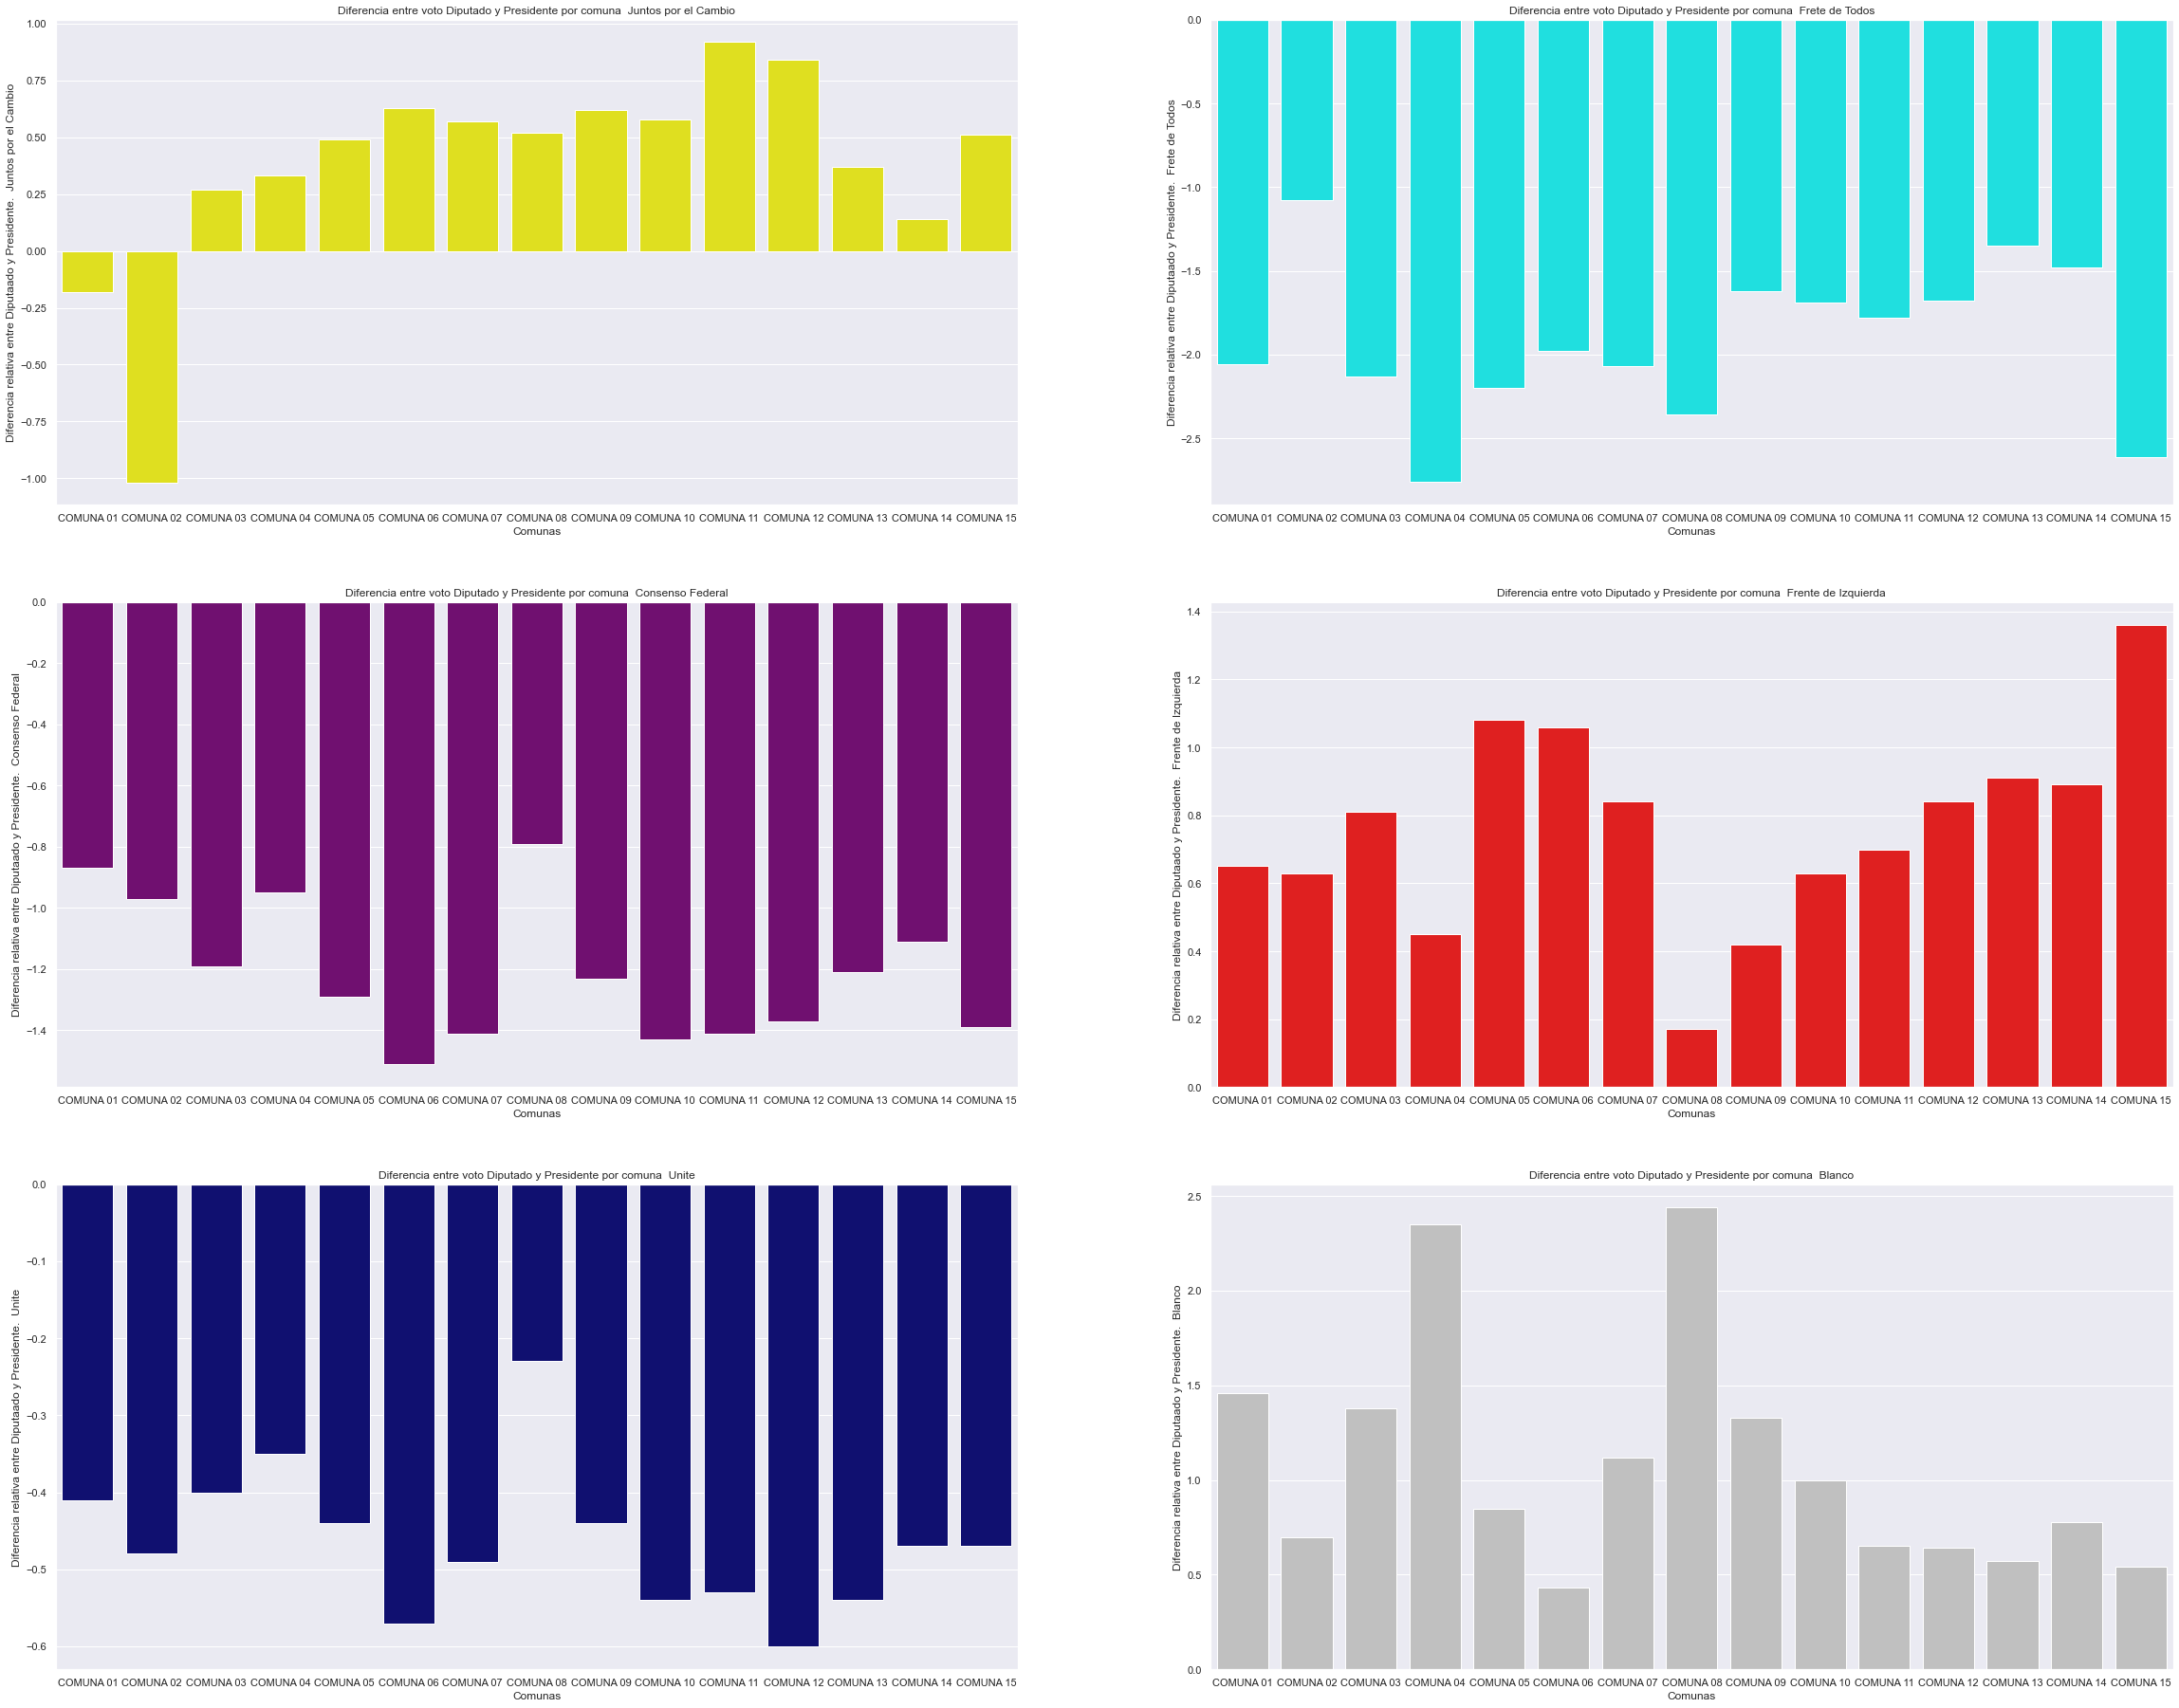

In [43]:
gr4 = comparacion_diferencia_comuna.reset_index()
fig_dims = (40,32)
colors = ["#FFFF00", "#00FFFF", "#800080", "#FF0000", "#000080", "#C0C0C0"]
fig, axes = plt.subplots(3,2,figsize=fig_dims)
col_rel = 1
partidos = ['Juntos por el Cambio', "Frete de Todos", "Consenso Federal", "Frente de Izquierda", "Unite", "Blanco"]
cont_partidos = 0


for i, ax in  enumerate(axes.flat):
    fig = sns.barplot(y = gr4.iloc[:,col_rel], x = 'NOMBRE_REGION', data= gr4,ax=ax, color= colors[cont_partidos])
    fig.set(xlabel= 'Comunas', ylabel= f'Diferencia relativa entre Diputaado y Presidente.  {partidos[cont_partidos]}', title= f'Diferencia entre voto Diputado y Presidente por comuna  {partidos[cont_partidos]}')

    col_rel += 2
    cont_partidos +=1




### Análisis 2.2
 Se puede apreciar que las agrupaciones que más pierden votos legislativos son *Frente de Todos* y *Consenso Federal*


Por lo tanto, nos parece que una buena estrategia consiste en apuntar a ir a buscar esos votos, con el objetivo de que esos votos que "pierden" dichos frentes, sean recperados con el FIT. Por una cuestión de afinidades ideológicas, resulta lógico pensar que estos algunos votantes de estos dos frentes (pertenecientes a ramas más o menos moderadas del Peronismo) voten al FIT para la categoría de Diputados Nacionales, sin embargo, nos parece que la mejor estrategia consiste en enfocar la busqueda de votos en el Frente de Todos, que, dentro del Peronismo, se acerca más a la "izquierda".  

### 2.3

Otra cosa que resulta interesante es observar los resultados obtenidos por el FIT para cada una de las categorías, no solamente para diputados nacionales y presidentes, a fin de determinar si la estrategia enfocada a conseguir votos para diputados nacionales tiene sentido o no


In [44]:
votos_fdt = diferencia_fdt_comuna[['VOTOS_AGRUPACION_PRES','PORCENTAJE_AGRUPACION_PRES','VOTOS_AGRUPACION_DIP', 'PORCENTAJE_AGRUPACION_DIP']]
votos_fdt.rename(columns={'VOTOS_AGRUPACION_PRES': 'VOTOS_FDT_PRES','PORCENTAJE_AGRUPACION_PRES': 'PORCENTAJE_FDT_PRES', 'VOTOS_AGRUPACION_DIP': 'VOTOS_FDT_DIP','PORCENTAJE_AGRUPACION_DIP': 'PORCENTAJE_FDT_DIP'}, inplace= True)

votos_fit = diferencia_fit_comuna[['VOTOS_AGRUPACION_PRES','PORCENTAJE_AGRUPACION_PRES','VOTOS_AGRUPACION_DIP', 'PORCENTAJE_AGRUPACION_DIP']]
votos_fit.rename(columns={'VOTOS_AGRUPACION_PRES': 'VOTOS_FIT_PRES','PORCENTAJE_AGRUPACION_PRES': 'PORCENTAJE_FIT_PRES', 'VOTOS_AGRUPACION_DIP': 'VOTOS_FIT_DIP','PORCENTAJE_AGRUPACION_DIP': 'PORCENTAJE_FIT_DIP'}, inplace= True)

votos_fit_fdt = pd.merge(votos_fdt, votos_fit, left_index= True, right_index= True)
votos_fit_fdt

C:\Users\Usuario\anaconda3\envs\prueba38\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,VOTOS_FDT_PRES,PORCENTAJE_FDT_PRES,VOTOS_FDT_DIP,PORCENTAJE_FDT_DIP,VOTOS_FIT_PRES,PORCENTAJE_FIT_PRES,VOTOS_FIT_DIP,PORCENTAJE_FIT_DIP
NOMBRE_REGION,,,,,,,,
COMUNA 01,42299,34.66,39693,32.60,4368,3.58,5149,4.23
COMUNA 02,19615,18.81,18427,17.73,2620,2.51,3261,3.14
COMUNA 03,43139,36.82,40581,34.69,5124,4.37,6062,5.18
COMUNA 04,57837,42.25,54060,39.49,5798,4.24,6427,4.69
COMUNA 05,43785,35.90,41093,33.70,5740,4.71,7065,5.79
COMUNA 06,38548,30.21,36017,28.23,5248,4.11,6597,5.17
COMUNA 07,47901,35.71,45034,33.64,5247,3.91,6361,4.75
COMUNA 08,51803,48.36,48922,46.00,4018,3.75,4164,3.92
COMUNA 09,44797,38.41,42907,36.79,4568,3.92,5056,4.34


### Análisis 2.3

 Si observamos detenidamente la información mostrada anteriormente, podemos notar que en prácticamente todas las comunas, el FIT obtuvo más votos para la categoría de diputados nacionales que para cualquier otra de las categorías. Esto podría parecer una coincidencia, pero si observamos la boleta del FIT de 2019



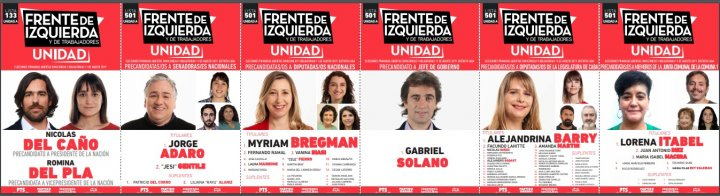

In [45]:
Image("Datos/boleta_fit_caba1.jpg")

Vemos que, por la forma en que está construida, necesariamente debó cortarse específicamente la categoría de Diputados Nacionales, separada de, por ejemplo, la de comuneros (que viene después), porque en caso contrario ambas categorías hubieran tenido porcentajes más similares que los que encontramos. Por lo que podemos afirmar con seguridad que el voto a Diputados Nacionales del fin es una categoría especialmente atractiva para analizar. 

### 2.4

 A continuación, y dado lo anterior, realizaremos una comparación de los votos para diputados obtenidos por el FIT y por el FDT en cada una de las comunas, con el objetivo de identificar cuáles son las comunas a las que le convendría al FIT ir a buscar votos

Comparación votos a Diputados Nacionales de FDT y FIT por comuna

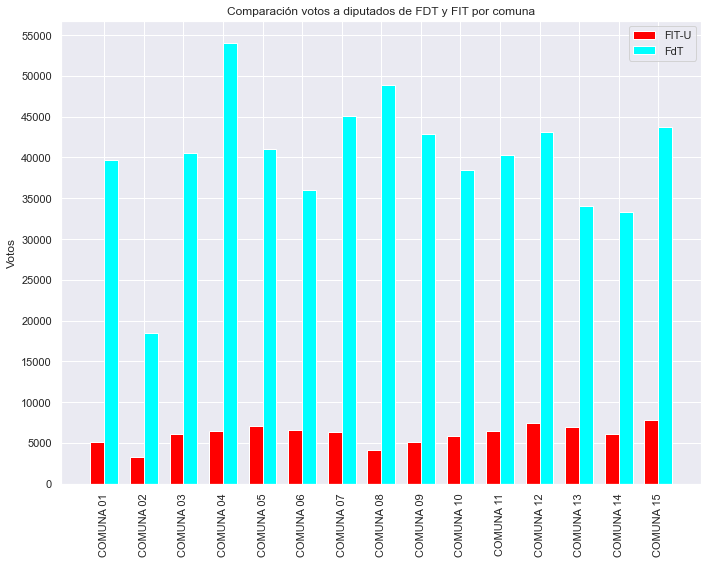

In [58]:
gr5 = votos_fit_fdt.reset_index()
labels = gr5["NOMBRE_REGION"]
x = np.arange(len(labels))  
width = 0.35 
yticks = np.arange(0,60000,5000)

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, gr5['VOTOS_FIT_DIP'], width, label='FIT-U', data= gr5, color= 'red')
rects2 = ax.bar(x + width/2, gr5['VOTOS_FDT_DIP'], width, label='FdT', color = 'cyan')


ax.set_ylabel('Votos')
ax.set_title('Comparación votos a diputados de FDT y FIT por comuna')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(yticks)
ax.legend()

plt.xticks(rotation=90)

fig.tight_layout()


#### Análisis 2.4

Como podemos observar en el gráfico anterior, si el objetivo ir a buscar votos para Diputados Nacionales en las comunas en las que el FIT obtuvo mejores resultados tanto a nivel presidencial como a nivel de Diputados Nacionales (comunas 4, 5, 6, 7, 10, 11, 12, y 15), lo ideal sería priorizar aquellas comunas en las que el principal frente al que se busca sacarle votos (el FDT) obtuvo también los mejores resultados.

En este caso, como podemos observar, las cinco comunas en las que el FDT obtuvo mejores resultados fueron la comuna 4, la comuna 8, la comuna 7, la comuna 15 y la comuna 11, en ese orden. Respecto del FIT, el orden de los resultados obtenido en esas mismas comunas (de mejor a peor) es: comuna 15, comuna 7, comuna 4, comuna 11, comuna 8. 



Por lo tanto podríamos recomendar, si el objetivo fuera obtener mejores resultados en la categoría de Diputados Nacionales (lo que consideramos la decisión adecuada), que las comunas a las que convendría ir a buscar votos son, en orden de mejor a peor: **comuna 11, comuna 4, comuna 7 y comuna 15**. 

Dado que son aquellas comunas en las que el FIT obtuvo buenos resultados pero también lo hizo el FDT (su principal "contrincante" a la hora de conseguir votos) y, además, las mismas están ordenadas de manera que se priorizan (con las consideraciones antes mencionadas) aquellas comunas en las que le fue relativamente mejor al FDT con respecto al FIT 


### 2.5

#### Finalmente, realizaremos una comparación de los votos para presidente obtenidos por el FIT y por el FDT en cada una de las comunas, con el objetivo de identificar cuáles son las comunas a las que le convendría al FIT ir a buscar votos presidenciales

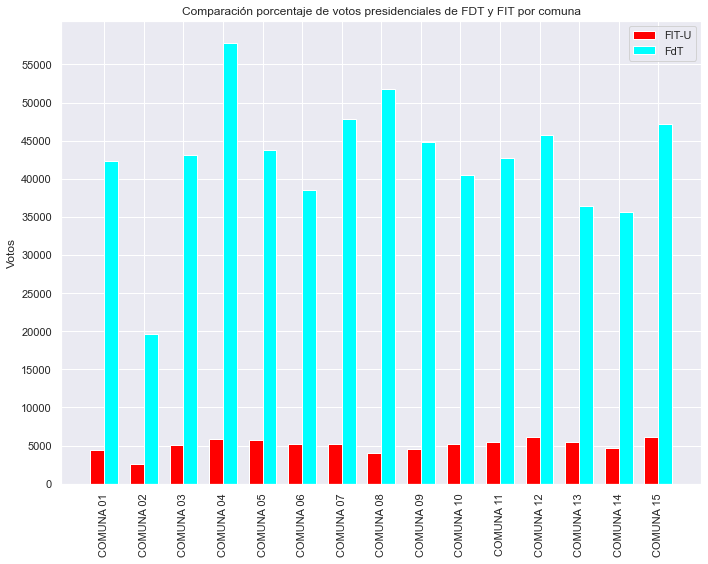

In [60]:
#Comparacion porcentaje de votos FIT y FDT por comuna
gr5 = votos_fit_fdt.reset_index()
labels = gr5["NOMBRE_REGION"]
x = np.arange(len(labels))  
width = 0.35 
yticks = np.arange(0,60000,5000)

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, gr5['VOTOS_FIT_PRES'], width, label='FIT-U', data= gr5, color= 'red')
rects2 = ax.bar(x + width/2, gr5['VOTOS_FDT_PRES'], width, label='FdT', color = 'cyan')


ax.set_ylabel('Votos')
ax.set_title('Comparación porcentaje de votos presidenciales de FDT y FIT por comuna')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(yticks)
ax.legend()

plt.xticks(rotation=90)

fig.tight_layout()

### Análisis 2.5

 Como podemos observar en el gráfico anterior, si el objetivo ir a buscar votos para presidente en las comunas en las que el FIT obtuvo mejores resultados tanto a nivel presidencial como a nivel de Diputados Nacionales (comunas 4, 5, 6, 7, 10, 11, 12, y 15), lo ideal sería priorizar aquellas comunas en las que el principal frente al que se busca sacarle votos (el FDT) obtuvo también los mejores resultados. 
 
 En este caso, como podemos observar, las cinco comunas en las que el FDT obtuvo mejores resultados presidenciales fueron la comuna 8, la comuna 4, la comuna 9, la comuna 15 y la comuna 3, en ese orden. Respecto del FIT, el orden de los resultados obtenido en esas mismas comunas (de mejor a peor) es: comuna 15, comuna 3, comuna 4, comuna 9, comuna 8. 



Por lo tanto podríamos recomendar, si el objetivo fuera obtener mejores resultados en la categoría de Presidente y Vicepresidente (lo cuál **NO recomendamos** como una estrategia adecuada), que las comunas a las que convendría ir a buscar votos son, en orden de mejor a peor: **comuna 4 y comuna 15**. 

Dado que son aquellas comunas en las que el FIT obtuvo buenos resultados pero también lo hizo el FDT (su principal "contrincante" a la hora de conseguir votos) y, además, las mismas están ordenadas de manera que se priorizan (con las consideraciones antes mencionadas) aquellas comunas en las que le fue relativamente mejor al FDT con respecto al FIT 